In [1]:
#importamos regex, pandas.
import re
from src.code_here import duplicados
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
#abrimos el archivo

df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [3]:
#imprimo todo para ver primeros y ultimos casos
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#conozco las columnas y elimino espacios en sus nombres
df.columns = df.columns.str.rstrip()
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
#Veo la estructura
df.shape

(25723, 24)

In [6]:
#reviso columnas, verifico que no haya datos NaN
"""Metodo sum para sumar el número de valores verdaderos por columna. 
Agrego una condición a las columnas nulas,usando corchetes que filtrará los datos y que mostrará 
solo columnas donde el número de valores nulos es mayor que cero"""
nul_colum = df.isnull().sum()
nul_colum [nul_colum > 0]


Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
df.dtypes
#Veo que tipos de datos hay en las columnas. Todos son textos excepto Year y Original Order que tienen números.

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [8]:
#Abro las columnas a las que no puedo acceder del dataframe para mirar su contenido
a = df[['Age', 'Injury', 'Fatal (Y/N)', 'Time']].head(10)
display(a)

,Age,Injury,Fatal (Y/N),Time
0,57,"No injury to occupant, outrigger canoe and pad...",N,18h00
1,11,Minor injury to left thigh,N,14h00 -15h00
2,48,Injury to left lower leg from surfboard skeg,N,07h45
3,NaN,Minor injury to lower leg,N,NaN
4,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN
5,NaN,"No injury, board bitten",N,NaN
6,18,FATAL,Y,Late afternoon
7,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN
8,15,Lower left leg bitten,N,17h00
9,12,Minor injury to foot,N,14h00


In [9]:
"""Llama la atención las columnas 'href formula', 'href','Case Number.', 'Case Number.1', 'Case Number.2',
'original order','pdf', 'Unnamed: 22','Unnamed: 23'las revisamos a ver que tipos de datos aportan. """

b = df[['pdf', 'href formula', 'href','Case Number','Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23']].head(5)
display(b)

,pdf,href formula,href,Case Number,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [10]:
#Con la funcion duplicados a ver si el contenido esta duplicado.

duplicates = df[df['Case Number'].duplicated(keep=False)]['Case Number'].tolist()
duplicates [:10]

['2014.08.02',
 '2014.08.02',
 '2013.10.05',
 '2013.10.05',
 '2012.09.02.b',
 '2012.09.02.b',
 '2009.12.18',
 '2009.12.18',
 '2006.09.02',
 '2006.09.02']

In [11]:
# Revisaremos: 'Case Number' si su contenido esta duplicado en 'Case Number.1' y 'Case Number.2'
 
duplicados('Case Number', 'Case Number.2')

False

In [12]:
duplicados ('Case Number', 'Case Number.1')

False

In [13]:
# Revisaremos:'Unnamed: 22' y 'Unnamed: 23 
duplicados ('href formula', 'href')

False

In [14]:
# Revisaremos:'Unnamed: 22' y 'Unnamed: 23 
duplicados ('Unnamed: 22','Unnamed: 23')

False

In [15]:
#Quiero saber que tanto parecido hay entre uno con la funcion isin, el cual indica si una columna tiene los mismos valores contenidos que en la otra
#Hay al rededor de un 10% de semejanzas entre una columna y otra
df['Case Number'].isin(df['Case Number.1']).value_counts()

True     23299
False     2424
Name: Case Number, dtype: int64

In [16]:
#isin (). dan 59 coincidencias entre una columna y otra
df['href formula'].isin(df['href']).value_counts()

True     25664
False       59
Name: href formula, dtype: int64

In [17]:
# isin () de Unnamed da solo 1 coincidencia entre una columna y otra
df['Unnamed: 22'].isin(df['Unnamed: 23']).value_counts()

True     25722
False        1
Name: Unnamed: 22, dtype: int64

In [18]:
 """Aunque no haya columnas duplicadas, decidí eliminarlas ya que no aportan información relevante para un análisis.
 He dedicido quedarme con Case Number,Date,Year,Country,Type,Name,Activity,Sex,Age,Injury, Time, Fatal'"""

shark_colclean = df.drop([ 'pdf', 'href formula', 'href','Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'], axis=1)
display (shark_colclean)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Ahora revisare que no hayan duplicados en las filas con duplicated()
shark_colclean.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Length: 25723, dtype: bool

In [20]:
#Eliminamos duplicados
shark_roawclean = shark_colclean.drop_duplicates()
display (shark_roawclean)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Elimino los datos nulos que quedan en la Dataframe
shark_clean= shark_roawclean[~shark_roawclean.Year.isnull()]
display (shark_clean)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [22]:
#HIPOTESIS 1: EN EL VERANO SE PRODUCEN MAS ATAQUES FATALES EN EL HEMISFERIO NORTE.
#LIMPIAR EL DATE PARA OBTENER LA INFORMACION

set(shark_clean['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

In [23]:
#lIMPIEZA DE ACCIDENTES FATALES

shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].fillna('UNKNOWN')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace('2017','UNKNOWN')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace('M','UNKNOWN')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace(' N','UNKNOWN')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace('M','UNKNOWN')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace(' N','N')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace('N ','N')
shark_clean['Fatal (Y/N)'] = shark_clean['Fatal (Y/N)'].str.replace('y','Y')

shark_clean.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace = True)
display(shark_clean)

/home/joyce/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/joyce/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/joyce/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [24]:
shark_clean['Fatal'].value_counts()

N          4294
Y          1388
UNKNOWN     618
Name: Fatal, dtype: int64

In [25]:
surf_df = shark_clean[(shark_clean['Activity'] == 'Surfing')]
surf_df.shape
#Cantidad de ataques de tiburones a surfistas

(971, 16)

In [26]:
#Conteo de ataques a surfistas por países

surf_df.Country.value_counts()

USA                                      564
AUSTRALIA                                195
SOUTH AFRICA                              97
BRAZIL                                    36
REUNION                                   20
NEW ZEALAND                               12
INDONESIA                                  6
MEXICO                                     6
COSTA RICA                                 4
ECUADOR                                    4
JAPAN                                      3
FRENCH POLYNESIA                           2
FIJI                                       2
BAHAMAS                                    2
NEW CALEDONIA                              2
EL SALVADOR                                2
VENEZUELA                                  2
SCOTLAND                                   1
ST HELENA, British overseas territory      1
ANGOLA                                     1
CANADA                                     1
URUGUAY                                    1
OKINAWA   

In [27]:
surf_df['Year'].value_counts()

2012.0    42
2015.0    42
2016.0    40
2009.0    39
2007.0    38
          ..
1970.0     1
1922.0     1
1964.0     1
1955.0     1
1963.0     1
Name: Year, Length: 70, dtype: int64

In [28]:
#Ataques a surfistas fatales

surf_df[["Country", "Fatal"]]

,Country,Fatal
2,USA,N
3,AUSTRALIA,N
15,SOUTH AFRICA,N
16,AUSTRALIA,N
19,AUSTRALIA,N
...,...,...
5235,AUSTRALIA,Y
5280,AUSTRALIA,N
6097,USA,Y
6143,USA,Y


<AxesSubplot:title={'center':'Son los ataques de tiburón fatales?'}>

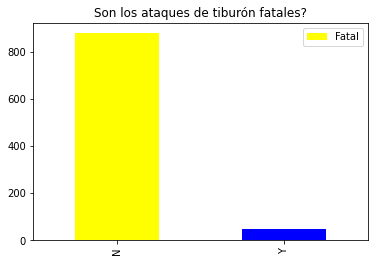

In [29]:
#Hipótesis: La mayoría de los ataques de tiburón no son mortales en surfistas
%matplotlib inline
surf_df[surf_df['Fatal'].isin(['Y','N'])]["Fatal"].value_counts()\
    .plot(kind='bar', title= "Son los ataques de tiburón fatales?",legend = True, color= ['yellow','blue'])

<AxesSubplot:>

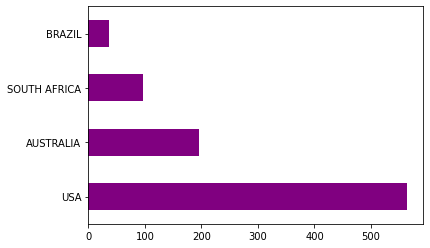

In [30]:
#Hipótesis: USA es el país con mas ataques de tiburones en surfistas
surf_df.groupby("Country")\
  .filter(lambda x: len(x) > 20)\
  .Country.value_counts()\
  .plot.barh(color='purple')